In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_excel("data/raw/Adidas US Sales Datasets.xlsx")
print(df.head())
print(df.tail())

   Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN

In [95]:
print('Shape:\n', df.shape, '\n')
print('Columns:\n', df.columns, '\n')
print('Info:\n', df.info(), '\n')
print('Describe:\n', df.describe(), '\n')
print('Nulls:\n', df.isna().sum(), '\n')
print('Duplicates:\n', df.duplicated().sum(), '\n')

Shape:
 (9652, 14) 

Columns:
 Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-n

In [96]:
df_raw = pd.read_excel("data/raw/Adidas US Sales Datasets.xlsx")

df = df_raw.drop(index=[0,1,2]).reset_index(drop=True)

df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df = df.drop(df.columns[0], axis=1)

print('Shape:\n', df.shape, '\n')
print('Columns:\n', df.columns, '\n')
print('Info:\n', df.info(), '\n')
print('Describe:\n', df.describe(), '\n')
print('Nulls:\n', df.isna().sum(), '\n')
print('Duplicates:\n', df.duplicated().sum(), '\n')

Shape:
 (9648, 13) 

Columns:
 Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=0) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  964

/var/folders/h9/78d8y54s1094rhy0vxgr6w400000gn/T/ipykernel_30216/3635571694.py:12: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print('Describe:\n', df.describe(), '\n')


In [97]:
#Converting appropriate columns to numeric type
numeric_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

#Converting invoice date to datetime type
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

#Saving the cleaned dataset to data/interim
df.to_excel("data/interim/adidas_sales_cleaned.xlsx", index=False)

df['Retailer'].value_counts()


Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

In [98]:
df['Region'].value_counts()

Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

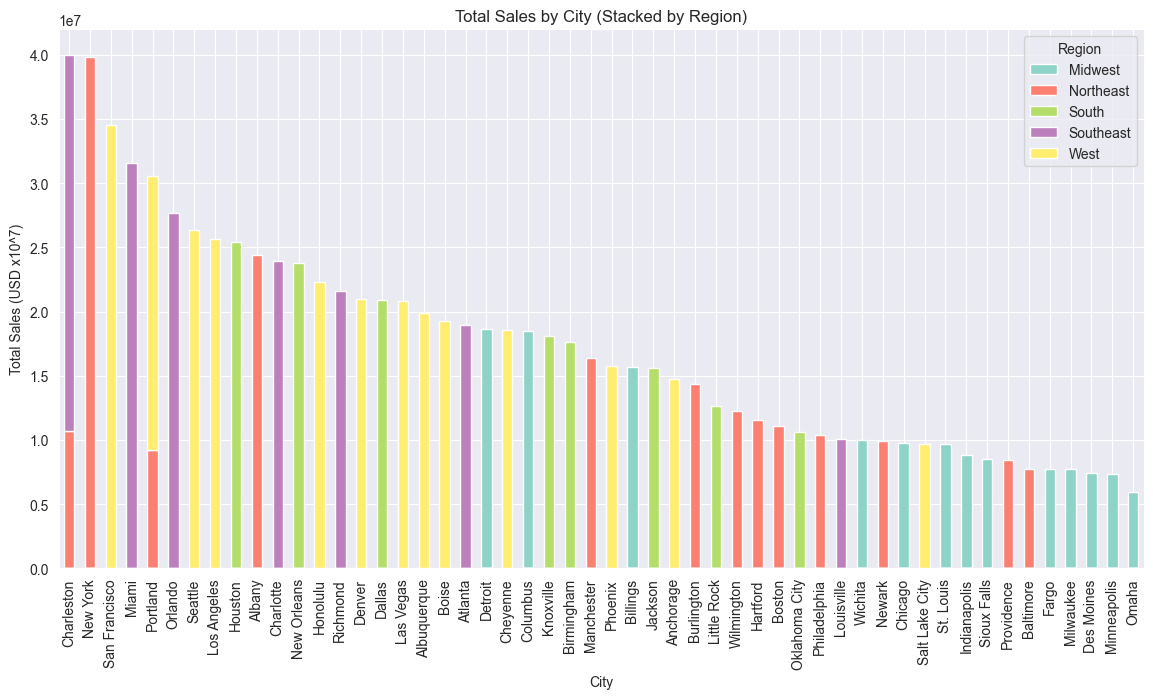

In [128]:
# Stacking bars ontop of each other to see the proportion of sales by region which is indicated by the colours in the legend
stacked = df.groupby(["City", "Region"])["Total Sales"].sum().unstack(fill_value=0)

# Order cities by total sales by adding up each of the cities' region's sales
stacked = stacked.loc[stacked.sum(axis=1).sort_values(ascending=False).index]

stacked.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="Set3"
)

plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Total Sales (USD x10^7)")
plt.title("Total Sales by City (Stacked by Region)")
plt.legend(title="Region")
plt.show()

In [135]:
city_product_sales = df.groupby(['City', 'Product'])['Units Sold'].sum().reset_index()
most_sold_product_per_city = city_product_sales.sort_values(['City', 'Units Sold'], ascending=[True, False])
top_products = most_sold_product_per_city.groupby('City').head(2)
print(top_products)

            City                  Product  Units Sold
2         Albany    Men's Street Footwear       13148
3         Albany          Women's Apparel        9937
8    Albuquerque    Men's Street Footwear       11546
7    Albuquerque  Men's Athletic Footwear       10032
14     Anchorage    Men's Street Footwear        8984
..           ...                      ...         ...
297    St. Louis          Women's Apparel        6442
302      Wichita    Men's Street Footwear        8454
303      Wichita          Women's Apparel        5414
308   Wilmington    Men's Street Footwear        8506
309   Wilmington          Women's Apparel        5529

[104 rows x 3 columns]


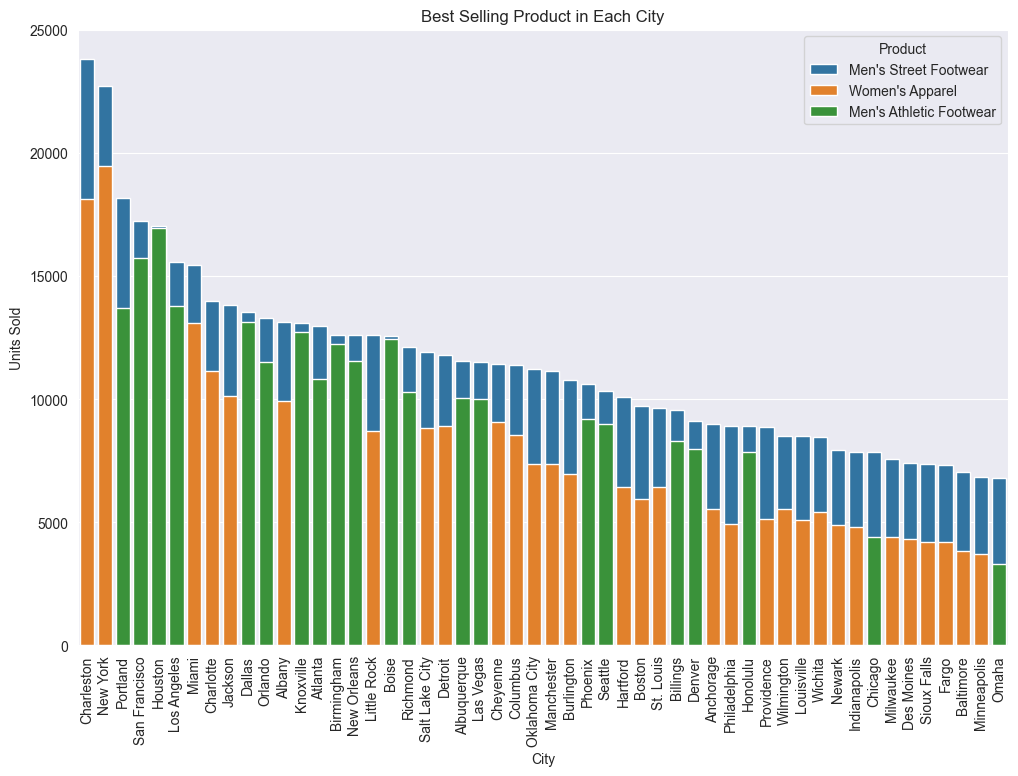

In [148]:
#Sort by most units sold
top_products = top_products.sort_values( "Units Sold", ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(
    data=top_products,
    x='City',
    y='Units Sold',
    hue='Product',
    dodge=False   # make one bar per city coloured by product (stacked but still showing its real value along the y-axis)
)
plt.xticks(rotation=90)
plt.title("Best Selling Product in Each City")
plt.ylabel("Units Sold")
plt.xlabel("City")
plt.legend(title="Product")
plt.show()

Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64 

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64 



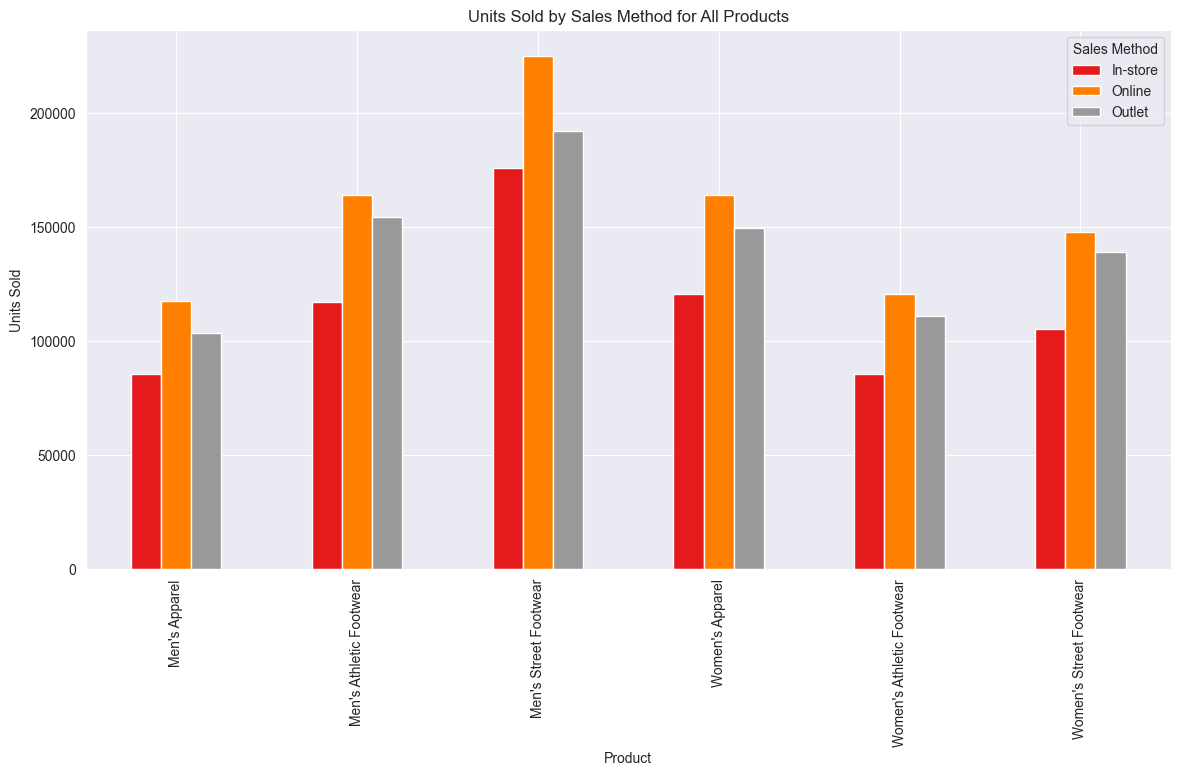

In [177]:
#Print how many times each sales method was used
sales_methods = df['Sales Method'].value_counts()
print(sales_methods, '\n')

#Print the number of items in each product category
all_products = df['Product'].value_counts()
print(all_products, '\n')

#Group products by sales method
sales_method_product = df.groupby(['Product', 'Sales Method'])['Units Sold'].sum().unstack(fill_value=0)

sales_method_product.plot(
    kind='bar',
    figsize=(14,7),
    colormap='Set1'
)

plt.title("Units Sold by Sales Method for All Products")
plt.ylabel("Units Sold")
plt.xlabel("Product")
plt.xticks(rotation=90)
plt.legend(title="Sales Method")
plt.show()